In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [5]:
#Integrantes
#David Porta
#Juan Josemaria
#Lucas Parodi
#Francesco Bassinos

In [6]:
data = pd.read_csv('C:/Users/Juan/Desktop/UPC/Septimo Ciclo/MachineLearning/Social_Network_Ads.csv')

In [7]:
data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [8]:
X = data.iloc[:, [2, 3]].values
y = data.iloc[:, -1].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [10]:
classifier_G = GaussianNB().fit(X_train, y_train)

In [11]:
y_pred_prob = classifier_G.predict_proba(X_test)

In [12]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob[:,1])

In [13]:
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9843260188087775

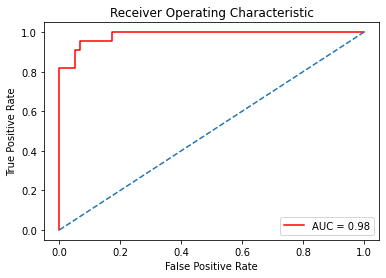

In [14]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [15]:
#######
#DECISION TREE
X = data.iloc[:,[2, 3]].values
y = data.iloc[:,-1].values
X_train, X_test, y_train, y_test_DT = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [16]:
param_grid = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
grid = GridSearchCV(tree.DecisionTreeClassifier(),param_grid,refit=True,verbose=2,cv=5)
grid.fit(X_train,y_train)
classifier_DT = tree.DecisionTreeClassifier(max_depth=2, min_samples_leaf=5).fit(X_train, y_train)
y_pred_DT = classifier_DT.predict(X_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] criterion=gini, max_depth=2, min_samples_leaf=5 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. criterion=gini, max_depth=2, min_samples_leaf=5, total=   0.3s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5 .................
[CV] .. criterion=gini, max_depth=2, min_samples_leaf=5, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5 .................
[CV] .. criterion=gini, max_depth=2, min_samples_leaf=5, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5 .................
[CV] .. criterion=gini, max_depth=2, min_samples_leaf=5, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5 .................
[CV] .. criterion=gini, max_depth=2, min_samples_leaf=5, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=10 ................
[CV] . criterion=gini, max_depth=2, min_samples_leaf=10, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=10 ................
[CV] . criterion=gini, max_depth=2, min_samples_leaf=10, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=10 ................
[CV] .

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  criterion=entropy, max_depth=2, min_samples_leaf=10, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=20 .............
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=20, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=20 .............
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=20, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=20 .............
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=20, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=20 .............
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=20, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=20 .............
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=20, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=50 .............
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=50, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=50 ......

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.5s finished


In [17]:
y_pred_prob_DT = classifier_DT.predict_proba(X_test)
false_positive_rate_DT, true_positive_rate_DT, thresholds_DT = roc_curve(y_test_DT, y_pred_prob_DT[:,1])

In [18]:
roc_auc_DT = auc(false_positive_rate_DT, true_positive_rate_DT)
roc_auc_DT

0.9494514106583072

In [19]:
#######
#KNN
X_train, X_test, y_train, y_test_KNN = train_test_split(X, y, test_size = 0.20, random_state = 0)
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [20]:
classifier_KNN = KNeighborsClassifier(n_neighbors=20).fit(X_train, y_train)

In [21]:
y_pred_KNN = classifier_KNN.predict(X_test)

In [22]:
y_pred_prob_KNN = classifier_KNN.predict_proba(X_test)

In [23]:
false_positive_rate_KNN, true_positive_rate_KNN, thresholds_KNN = roc_curve(y_test_KNN, y_pred_prob_KNN[:,1])

In [24]:
roc_auc_KNN = auc(false_positive_rate_KNN, true_positive_rate_KNN)
roc_auc_KNN

0.9725705329153604

In [25]:
###
#REDES NEURONALES
X_train, X_test, y_train, y_test_RN = train_test_split(X, y, test_size = 0.20, random_state = 0)
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [26]:
classifier_RN = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=500, alpha=0.0001,
                     solver='adam', random_state=21,tol=0.000000001)

In [27]:
#Tuning
param_grid = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [28]:
grid = GridSearchCV(MLPClassifier(max_iter=500),param_grid,refit=True,verbose=2,cv=5)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, total=   2.4s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, total=   0.6s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, total=   0.6s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, total=   0.6s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, total=   0.6s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, total=   0.6s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, total=   0.4s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, total=   0.5s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant,

C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd, total=   0.6s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd, total=   0.6s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd, total=   0.6s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd, total=   0.6s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd, total=   0.6s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam, total=   0.3s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam, total=   0.4s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam, total=   0.4s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive,

C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, total=   0.3s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, total=   0.4s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, total=   0.4s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, total=   0.4s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, total=   0.4s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, total=   0.3s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, total=   0.3s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, total=   0.3s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, total=   0.2s
[CV] activation=tanh, alpha=0.0001, hidden

C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, total=   0.3s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, total=   0.4s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, total=   0.4s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, total=   0.4s
[CV] activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=tanh, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, total=   0.4s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, total=   0.6s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, total=   0.6s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 
[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, total=   0.4s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, total=   0.6s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, total=   0.6s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, total=   0.5s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, total=   0.4s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, total=   0.4s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, tota

C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd, total=   0.6s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd, total=   0.6s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd, total=   0.4s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd, total=   0.4s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd, total=   0.9s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam, total=   0.7s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam, total=   0.3s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam, total=   0.6s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam, tota

C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, total=   0.4s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, total=   0.4s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, total=   0.3s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, total=   0.4s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, total=   0.3s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, total=   0.3s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, total=   0.3s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd 
[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, total=   0.2s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), 

C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, total=   0.3s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, total=   0.4s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, total=   0.3s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, total=   0.3s
[CV] activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=tanh, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, total=   0.4s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, total=   0.7s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, total=   0.8s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, total=   0.7s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, total=   0.7s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, total=   0.9s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, total=   0.9s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, total=   0.4s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, total=   0.6s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=constant,

C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd, total=   0.7s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd, total=   0.8s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd, total=   1.3s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd, total=   0.7s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd, total=   0.7s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam, total=   0.5s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam, total=   0.8s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam, total=   0.8s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam, total=   1.1s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam, total=   0.8s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd, total=   0.4s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd, total=   0.4s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd, total=   0.4s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd, total=   0.4s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd, total=   0.4s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, total=   0.4s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, total=   0.4s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, total=   0.3s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, total=   0.4s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, total=   0.4s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, total=   0.4s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, total=   0.3s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, total=   0.4s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, total=   0.4s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, total=   0.4s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, total=   0.4s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, total=   0.3s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, total=   0.4s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, total=   0.4s
[CV] activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.0001, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, total=   0.3s
[CV] activation=relu, alpha=0.05, 

C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, total=   0.7s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, total=   0.7s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, total=   0.7s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, total=   0.7s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=sgd, total=   0.9s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, total=   1.2s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, total=   0.5s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, total=   0.6s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=constant, solver=adam, tota

C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd, total=   0.7s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd, total=   0.8s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd, total=   1.2s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd, total=   0.9s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=sgd, total=   0.7s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam, total=   0.5s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam, total=   0.5s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam, total=   0.5s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(10, 30, 10), learning_rate=adaptive, solver=adam, tota

C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd, total=   0.7s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd, total=   0.6s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd, total=   0.4s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd, total=   0.4s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=sgd, total=   0.4s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, total=   0.4s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, total=   0.4s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam 
[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, total=   0.3s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, total=   0.4s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=constant, solver=adam, total=   0.4s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, total=   0.4s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, total=   0.4s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, total=   0.4s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, total=   0.3s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=sgd, total=   0.4s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, total=   0.3s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam 


C:\ProgramData\Anaconda3_delete\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, total=   0.4s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, total=   0.3s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, total=   0.3s
[CV] activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam 
[CV]  activation=relu, alpha=0.05, hidden_layer_sizes=(20,), learning_rate=adaptive, solver=adam, total=   0.4s


[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:  1.3min finished


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=500),
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']},
             verbose=2)

In [29]:
classifier_RN = MLPClassifier(hidden_layer_sizes=(10,30,10),max_iter=500,alpha=0.05).fit(X_train, y_train)

In [30]:
y_pred_RN = classifier_RN.predict(X_test)

In [31]:
y_pred_prob_RN = classifier_RN.predict_proba(X_test)

In [32]:
false_positive_rate_RN, true_positive_rate_RN, thresholds_RN = roc_curve(y_test_RN, y_pred_prob_RN[:,1])

In [33]:
roc_auc_RN = auc(false_positive_rate_RN, true_positive_rate_RN)
roc_auc_RN

0.975705329153605

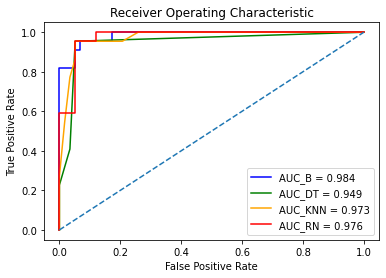

In [34]:
###############
#1
plt.title('Receiver Operating Characteristic')

plt.plot(false_positive_rate,true_positive_rate, color='blue',label = 'AUC_B = %0.3f' % roc_auc)

plt.plot(false_positive_rate_DT,true_positive_rate_DT, color='green',label = 'AUC_DT = %0.3f' % roc_auc_DT)

plt.plot(false_positive_rate_KNN,true_positive_rate_KNN, color='orange',label = 'AUC_KNN = %0.3f' % roc_auc_KNN)

plt.plot(false_positive_rate_RN,true_positive_rate_RN, color='red',label = 'AUC_RN = %0.3f' % roc_auc_RN)

plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1],linestyle='--')

plt.axis('tight')

plt.ylabel('True Positive Rate')

plt.xlabel('False Positive Rate')

plt.show()

In [35]:
#El AUC (AREA UNDER CURVE) MAYOR ES EL DE NAIVE BAYES, POR LO TANTO, ES EL MEJOR MODELO A USAR
#Y ES EL QUE USAREMOS PARA REALIZAR LA CLASIFICACION EN LA PREGUNTA 3

In [36]:
#####
#2
#NAIVE BAYES
print(classification_report(y_test, y_pred))

NameError: name 'y_pred' is not defined

In [ ]:
#DECISION TREE
print(classification_report(y_test_DT,y_pred_DT)[])

In [ ]:
#KNN
print(classification_report(y_test_KNN, y_pred_KNN))

In [ ]:
#REDES NEURONALES
print(classification_report(y_test_RN, y_pred_RN))

In [ ]:
#####
#3
#MOSTRANDO LOS DATOS DEL MODELO QUE OBTUVO MAYOR AUC (NAIVE BAYES)
dataf = pd.concat([pd.DataFrame(X_test),pd.DataFrame(y_test),pd.DataFrame(y_pred),pd.DataFrame(y_pred_prob)],axis=1)
dataf.head(10)

In [ ]:
dataf.columns = ['c_age','c_estimatedSalary','Purchased','Purchased_Pred','Target_Pred_Prob_0','Target_Pred_Prob_1']
dataf.head(10)

In [ ]:
###############
#CREACION DE LA NUEVA COLUMNA
newColumn=pd.DataFrame(columns=['score'])
lista=[]
dataframe_2=pd.DataFrame(dataf)

for i in range (len(dataf)):
    if dataf['Target_Pred_Prob_1'][i] <= 0.2:
        lista.append("MB")
    elif dataf['Target_Pred_Prob_1'][i] > 0.2 and dataf['Target_Pred_Prob_1'][i] <= 0.4:
        lista.append("B")
    elif dataf['Target_Pred_Prob_1'][i] > 0.4 and dataf['Target_Pred_Prob_1'][i] <= 0.6:
        lista.append("M")
    elif dataf['Target_Pred_Prob_1'][i] > 0.6 and dataf['Target_Pred_Prob_1'][i] <= 0.8:
        lista.append("A")
    else:
        lista.append("MA")
for i in range (len(dataf)):
    newColumn.loc[i]=lista[i]
dataframe_2["Score"]=newColumn['score']
dataframe_2.head(8)